# Classification of Movie Genres Based on Synopsis


## Business Understanding

Movies are a popular means of entertainment all around the world. Developing a predictive model that automatically generates a movie's genre based on its plot summary is certainly a good idea because there is now a lot of streaming services and websites available and there is a lot more to come. It could also reduce the cost of manually tagging movies.






##### GIT CONFIG

In [1]:
pwd

'/content'

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
cd drive/MyDrive/git-colab-repo/movie-genre-classification

/content/drive/MyDrive/git-colab-repo/movie-genre-classification


In [4]:
!git status

Refresh index: 100% (11/11), done.
On branch model-tfidf
Changes not staged for commit:
  (use "git add <file>..." to update what will be committed)
  (use "git restore <file>..." to discard changes in working directory)
	modified:   main-CountVectorizer.ipynb
	modified:   main.ipynb

no changes added to commit (use "git add" and/or "git commit -a")


pastikan dulu kerja di branch apaa

In [5]:
!git config --global user.email "asmi.amalia23@gmail.com"
!git config --global user.name "naamalia23"

In [7]:
!git add .
!git commit -m 'fixed branch tf-idf'

[model-tfidf ff463ad] fixed branch tf-idf
 2 files changed, 2 insertions(+), 2 deletions(-)
 rewrite main-CountVectorizer.ipynb (90%)
 rewrite main.ipynb (90%)


In [9]:
!git push -u origin "model-tfidf"

Enumerating objects: 7, done.
Counting objects: 100% (7/7), done.
Delta compression using up to 2 threads
Compressing objects: 100% (4/4), done.
Writing objects: 100% (4/4), 343.11 KiB | 6.86 MiB/s, done.
Total 4 (delta 2), reused 0 (delta 0), pack-reused 0
remote: Resolving deltas: 100% (2/2), completed with 2 local objects.
To https://github.com/naamalia23/movie-genre-classification
   266c052..ff463ad  model-tfidf -> model-tfidf
Branch 'model-tfidf' set up to track remote branch 'model-tfidf' from 'origin'.


##### change to working branch

In [10]:
!git checkout -b 'bert-model'

Switched to a new branch 'bert-model'


In [11]:
!git status

On branch bert-model
Changes not staged for commit:
  (use "git add <file>..." to update what will be committed)
  (use "git restore <file>..." to discard changes in working directory)
	modified:   main.ipynb

no changes added to commit (use "git add" and/or "git commit -a")


## Data Understanding

The dataset used in this notebook was obtained from kaggle and it contains movie plot summaries scraped from wikipedia. The dataset has 34,886 entries.The following details are contained in the dataset:

1. Release Year - year of release
2. Title - title of the movies
3. Origin/Ethnicity - country of origin of the movies
4. Director - director names associated with the movies
5. Cast - cast name associated with the movies
6. Wiki Page - wikipedia page of the movies
7. Plot - plot summary of the movies
[link text](https://)

## Data Exploration

### Import necessary libraries and packages



In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import itertools
import warnings
import time
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score
from sklearn.utils.class_weight import compute_class_weight
import re
import nltk
import string
from nltk.corpus import stopwords
from nltk import word_tokenize, FreqDist
from nltk.stem import WordNetLemmatizer
import spacy
spacy.cli.download("en_core_web_sm")
nlp = spacy.load("en_core_web_sm")
from wordcloud import WordCloud, STOPWORDS
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.multiclass import OneVsRestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from yellowbrick.text import FreqDistVisualizer
!pip install dataframe_image
import dataframe_image as dfi
from mlxtend.feature_selection import ColumnSelector

✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.7/6.7 MB 53.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 398.5/398.5 kB 46.3 MB/s eta 0:00:00


Here's a brief summary of the required libraries and packages:

**Data Processing and Visualization:**

1. pandas: Data manipulation library.
2. numpy: Numerical computing library.
3. matplotlib: Plotting library for data visualization.
4. seaborn: Statistical data visualization based on Matplotlib.
5. WordCloud: Generating word clouds from text data.
6. dfi (dataframe_image): Generating images from Pandas DataFrames.
7. FreqDistVisualizer: Visualizing word frequency distributions.

**Text Processing:**

1. nltk: Natural Language Toolkit for text processing.
2. spacy: Natural language processing library. You've downloaded the English 3. language model (en_core_web_sm) using spacy.cli.download and loaded it into nlp.

**Machine Learning and Model Evaluation:**

1. sklearn: Scikit-learn library for machine learning.
2. LogisticRegression: Logistic Regression classifier.
3. DummyClassifier: Dummy Classifier for baseline comparison.
4. MultinomialNB: Naive Bayes classifier for multinomial models.
4. GaussianNB: Naive Bayes classifier for Gaussian-distributed data.
5. train_test_split: Splitting the dataset into training and testing sets.
6. GridSearchCV: Hyperparameter tuning using grid search.
7. Pipeline: Constructing a pipeline of machine learning operations.
8. OneVsRestClassifier: One-vs-the-rest classifier for multi-label classification.
9. RandomForestClassifier: Random Forest classifier.
10. DecisionTreeClassifier: Decision Tree classifier.
11. SVC: Support Vector Classification
11. accuracy_score, classification_report, confusion_matrix, f1_score: Metrics for evaluating machine learning models.
12. compute_class_weight: Utility for computing class weights to handle imbalanced datasets.

**Feature Extraction:**

1. TfidfVectorizer, CountVectorizer: Converting text data into numerical features.

**Other:**

1. warnings: Suppressing warnings.
2. re: Regular expression library.
3. STOPWORDS: Stopwords for filtering out common words.
4. time: Tracks and measures time

### Reading dataset into pandas dataframe

In [13]:
# Loading the dataset from the CSV file
movies_df =  pd.read_csv('/content/drive/MyDrive/git-colab-repo/movie-genre-classification/data/wiki_movie_plots_deduped.csv')

# Displaying the first few rows of the DataFrame
movies_df.head()

,Release Year,Title,Origin/Ethnicity,Director,Cast,Genre,Wiki Page,Plot
0,1901,Kansas Saloon Smashers,American,Unknown,NaN,unknown,https://en.wikipedia.org/wiki/Kansas_Saloon_Sm...,"A bartender is working at a saloon, serving dr..."
1,1901,Love by the Light of the Moon,American,Unknown,NaN,unknown,https://en.wikipedia.org/wiki/Love_by_the_Ligh...,"The moon, painted with a smiling face hangs ov..."
2,1901,The Martyred Presidents,American,Unknown,NaN,unknown,https://en.wikipedia.org/wiki/The_Martyred_Pre...,"The film, just over a minute long, is composed..."
3,1901,"Terrible Teddy, the Grizzly King",American,Unknown,NaN,unknown,"https://en.wikipedia.org/wiki/Terrible_Teddy,_...",Lasting just 61 seconds and consisting of two ...
4,1902,Jack and the Beanstalk,American,"George S. Fleming, Edwin S. Porter",NaN,unknown,https://en.wikipedia.org/wiki/Jack_and_the_Bea...,The earliest known adaptation of the classic f...


### Descriptive Statistics

In [14]:
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34886 entries, 0 to 34885
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Release Year      34886 non-null  int64 
 1   Title             34886 non-null  object
 2   Origin/Ethnicity  34886 non-null  object
 3   Director          34886 non-null  object
 4   Cast              33464 non-null  object
 5   Genre             34886 non-null  object
 6   Wiki Page         34886 non-null  object
 7   Plot              34886 non-null  object
dtypes: int64(1), object(7)
memory usage: 2.1+ MB


In [15]:
movies_df.describe()

,Release Year
count,34886.000000
mean,1981.314252
std,27.815174
min,1901.000000
25%,1957.000000
50%,1988.000000
75%,2007.000000
max,2017.000000


In [16]:
movies_df.shape

(34886, 8)

The DataFrame named movies_df comprises movie-related information with 34,886 entries and 8 columns. The dataset's release years range from 1901 to 2017.

## Exploratory Data Analysis

### Movie Distributions by Release Year

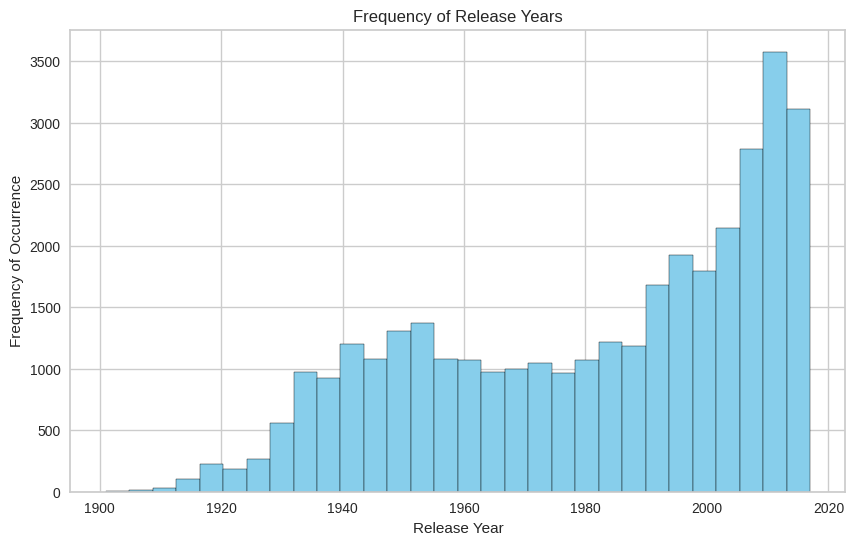

In [17]:
# Create a figure and axis with specified size
fig, ax = plt.subplots(figsize=(10, 6))

# Plot a histogram of the 'Release Year' column
ax.hist(movies_df['Release Year'], bins=30, color='skyblue', edgecolor='black')

# Set the title and axis labels
ax.set_title('Frequency of Release Years')
ax.set_xlabel('Release Year')
ax.set_ylabel('Frequency of Occurrence')

# Display the plot
plt.show()

# Save the figure as an image
fig.savefig('/content/drive/MyDrive/git-colab-repo/movie-genre-classification/images/freqOfReleaseYear.png')

### Movie distribution by Movie Origin

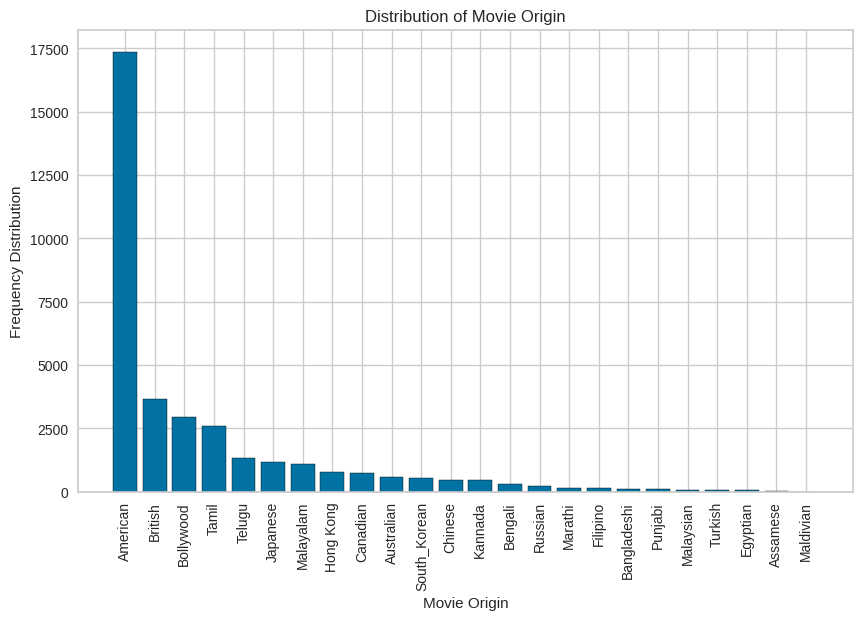

In [18]:
# Create a figure and axis with specified size
fig, ax = plt.subplots(figsize=(10, 6))

# Plot a count plot of the 'Origin/Ethnicity' column
origin_counts = movies_df['Origin/Ethnicity'].value_counts()
ax.bar(origin_counts.index, origin_counts, edgecolor='black')

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Set the title and axis labels
plt.title('Distribution of Movie Origin')
plt.xlabel('Movie Origin')
plt.ylabel('Frequency Distribution')

# Save the figure as an image
fig.savefig('/content/drive/MyDrive/git-colab-repo/movie-genre-classification/images/FreqOrigin.png')


## Data Cleaning

### Subsetting the dataset and resetting the index

In [19]:
# Subsetting the dataset to include only entries with a known genre
movies_df_subset = movies_df.loc[movies_df['Genre'] != 'unknown']

# Resetting the index and dropping the old index
movies_df_subset.reset_index(drop=True, inplace=True)

### Checking the number of unique values in the genres column

In [20]:
# Count the occurrences of each unique value in the 'Genre' column
genres_counts = movies_df_subset['Genre'].value_counts()

# Print the number of different genres in the dataset
num_unique_genres = len(genres_counts)
print(f'There are {num_unique_genres} different genres in the dataset:')

# Print the count of each genre
print(genres_counts)

There are 2264 different genres in the dataset:
drama                            5964
comedy                           4379
horror                           1167
action                           1098
thriller                          966
                                 ... 
cbc-tv miniseries                   1
bio-drama                           1
national film board docudrama       1
cult drama                          1
horror romantic comedy              1
Name: Genre, Length: 2264, dtype: int64


### Obtaining the top 6 most often occurring genres in the dataset

In [21]:
# Select the top 6 genres based on their occurrences
top_genres = pd.value_counts(movies_df_subset['Genre']).head(6).reset_index()

# Rename the columns for clarity
top_genres.columns = ['Genres', 'Number of Movies']

# Display the resulting DataFrame
top_genres

,Genres,Number of Movies
0,drama,5964
1,comedy,4379
2,horror,1167
3,action,1098
4,thriller,966
5,romance,923


### The dataset's top six genres' movie distribution

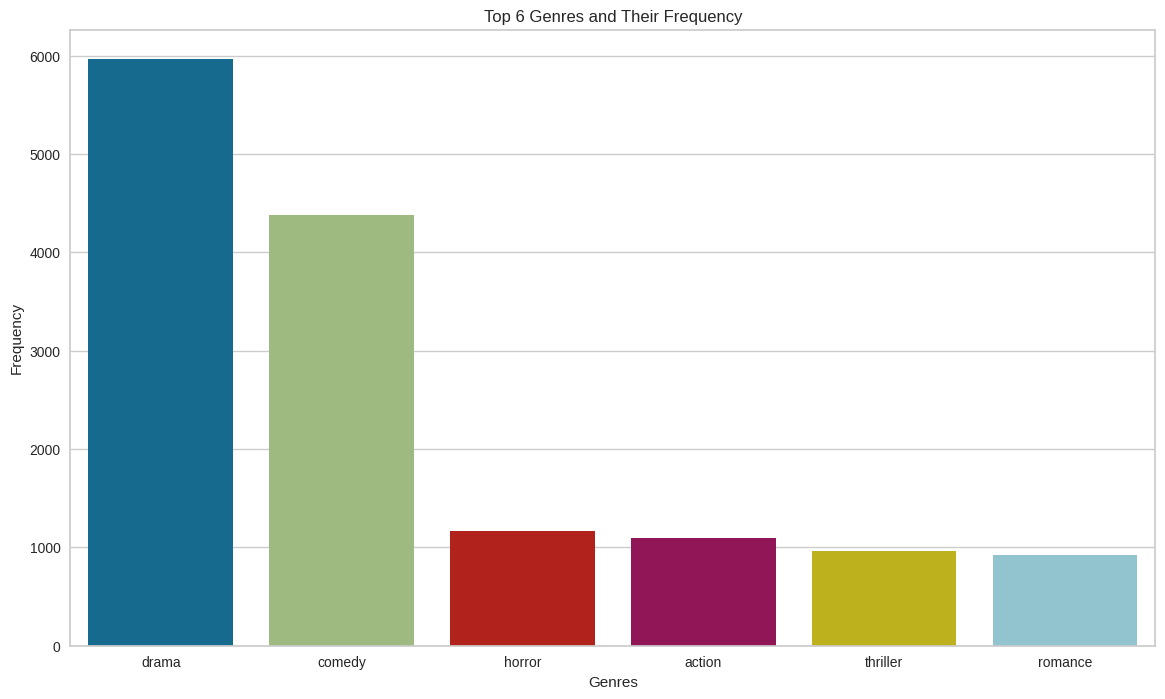

In [22]:
# Assuming 'top_genres' is your DataFrame
fig, ax = plt.subplots(figsize=(14, 8))

# Use seaborn's barplot to visualize the top genres
sns.barplot(x='Genres', y='Number of Movies', data=top_genres)

# Set the title and axis labels
plt.title('Top 6 Genres and Their Frequency')
plt.xlabel('Genres')
plt.ylabel('Frequency')

# Save the figure as an image
fig.savefig('/content/drive/MyDrive/git-colab-repo/movie-genre-classification/images/FreqOfTopGenres.png')

# Display the plot (optional)
plt.show()

### Label Encoding

In [23]:
top_genres_list = ['drama', 'comedy', 'horror', 'action', 'thriller', 'romance']

# Create a new 'labels' column based on conditions and choices using .loc
for genre in top_genres_list:
    movies_df_subset.loc[movies_df_subset['Genre'] == genre, 'labels'] = top_genres_list.index(genre) + 1

# Fill NaN values with 0 (for entries that don't match any genre)
movies_df_subset['labels'].fillna(0, inplace=True)

# Convert 'labels' column to integer type
movies_df_subset['labels'] = movies_df_subset['labels'].astype(int)

<ipython-input-23-080055e0132d>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies_df_subset.loc[movies_df_subset['Genre'] == genre, 'labels'] = top_genres_list.index(genre) + 1
<ipython-input-23-080055e0132d>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies_df_subset['labels'].fillna(0, inplace=True)
<ipython-input-23-080055e0132d>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/panda

In [24]:
movies_df_subset.sample(10)

,Release Year,Title,Origin/Ethnicity,Director,Cast,Genre,Wiki Page,Plot,labels
21634,2016,The Bodyguard,Chinese,Sammo Hung,"Sammo Hung, Andy Lau, Zhu Yuchen, Li Qinqin, F...",comedy / action / mystery / adventure,https://en.wikipedia.org/wiki/The_Bodyguard_(2...,The film is set in the 2000s in a medium-sized...,0
26871,1961,Vagdanam,Telugu,Aatreya,"A. Nageswara Rao, Krishna Kumari, Gummadi, Chi...",drama,https://en.wikipedia.org/wiki/Vagdanam,"Vishwanatham (Nagayya), Ranganatham (Gummadi) ...",1
6037,1954,The Great Diamond Robbery,American,Robert Z. Leonard,"Red Skelton, James Whitmore, Cara Williams",comedy,https://en.wikipedia.org/wiki/The_Great_Diamon...,"A diamond potentially worth $2 million, the ""B...",2
22871,1954,Munna,Bollywood,K. A. Abbas,"Sulochana Chatterji, P. Jairaj, Achala Sachdev...",social children,https://en.wikipedia.org/wiki/Munna_(1954_film),Munna (Romi) is a six-year-old boy who lives w...,0
22829,1951,Ek Tha Raja,Bollywood,K. Ramnath,"M G Ramachandran, Anjali Devi, Pandaribai Madh...",costume drama,https://en.wikipedia.org/wiki/Ek_Tha_Raja_(195...,"Urvasi (Anjali Devi), is the young mistress of...",0
5569,1952,Hans Christian Andersen,American,Charles Vidor,"Danny Kaye, Farley Granger","musical, biography",https://en.wikipedia.org/wiki/Hans_Christian_A...,"In the 1830s, in the small Danish town of Oden...",0
7295,1960,Pay or Die,American,Richard Wilson,"Ernest Borgnine, Zohra Lampert",crime,https://en.wikipedia.org/wiki/Pay_or_Die,The film is a dramatization of the career of c...,0
16041,2012,The Watch,American,Akiva Schaffer,"Ben Stiller, Vince Vaughn, Jonah Hill, Richard...",sci-fi comedy,https://en.wikipedia.org/wiki/The_Watch_(2012_...,"In the town of Glenview, Ohio, Evan Trautwig (...",0
18239,1947,Uncle Silas,British,Charles Frank,"Jean Simmons, Katina Paxinou",drama,https://en.wikipedia.org/wiki/Uncle_Silas_(film),Caroline Ruthyn is the teenage niece of her el...,1
12293,1996,Boys,American,Stacy Cochran,"Winona Ryder, Lukas Haas",drama,https://en.wikipedia.org/wiki/Boys_(1996_film),John Baker Jr. (Lukas Haas) is a boy bored wit...,1


In [25]:
label_counts = movies_df_subset['labels'].value_counts()

# Display the counts
print(label_counts)

0    14306
1     5964
2     4379
3     1167
4     1098
5      966
6      923
Name: labels, dtype: int64


### Filtering label columns

In [26]:
movies_df_label = movies_df_subset[movies_df_subset['labels'] != 0].reset_index(drop=True)

Filtering the movies_df_subset dataframe such that it only contains a single genre element labelled as 1-6.

In [27]:
movies_df_label.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14497 entries, 0 to 14496
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Release Year      14497 non-null  int64 
 1   Title             14497 non-null  object
 2   Origin/Ethnicity  14497 non-null  object
 3   Director          14497 non-null  object
 4   Cast              14272 non-null  object
 5   Genre             14497 non-null  object
 6   Wiki Page         14497 non-null  object
 7   Plot              14497 non-null  object
 8   labels            14497 non-null  int64 
dtypes: int64(2), object(7)
memory usage: 1019.4+ KB


### Table displaying the genre label allocations

In [28]:
assigned_label = pd.DataFrame(
    sorted(
        list(zip(movies_df_label['Genre'].unique(), movies_df_label['labels'].unique())),
        key=lambda x: x[1],
        reverse=False
    ),
    columns=['genres', 'labels']
)

merged_df = pd.merge(assigned_label, top_genres, left_on='genres', right_on='Genres')

# Drop the duplicate 'Genres' column after the merge
merged_df.drop('Genres', axis=1, inplace=True)

# Display the resulting DataFrame
print(merged_df)

     genres  labels  Number of Movies
0     drama       1              5964
1    comedy       2              4379
2    horror       3              1167
3    action       4              1098
4  thriller       5               966
5   romance       6               923


### Dropping unnecessary columns

In [29]:
# unnecessary columns for this project
columns_to_drop = ['Release Year', 'Origin/Ethnicity', 'Director', 'Cast', 'Wiki Page']

# Drop unnecessary columns
movies_df_label.drop(columns=columns_to_drop, inplace=True)

In [30]:
movies_df_label.head()

,Title,Genre,Plot,labels
0,The Suburbanite,comedy,The film is about a family who move to the sub...,2
1,How Brown Saw the Baseball Game,comedy,Before heading out to a baseball game at a nea...,2
2,Laughing Gas,comedy,The plot is that of a black woman going to the...,2
3,The Adventures of Dollie,drama,On a beautiful summer day a father and mother ...,1
4,The Black Viper,drama,A thug accosts a girl as she leaves her workpl...,1


## Preprocessing data in the 'Plot' column

Here is an example of a storyline summary from 'Plot' column

In [31]:
movies_df_label['Plot'][2]

'The plot is that of a black woman going to the dentist for a toothache and being given laughing gas. On her way walking home, and in other situations, she can\'t stop laughing, and everyone she meets "catches" the laughter from her, including a vendor and police officers.'

In [32]:
copied_movies_df_label = movies_df_label.copy(deep = True)

### Total amount of words used in the plot summaries

In [33]:
def word_length(text):
    num_of_words = sum(len(row.split()) for row in text)
    return num_of_words

raw_length = word_length(copied_movies_df_label['Plot'])

### Total amount of UNIQUE words found in plot summaries.

In [34]:
def unique_word_length(text):
    unique_words = set()
    for row in text:
        words = row.split()
        unique_words.update(words)
    return len(unique_words)

raw_unique_length = unique_word_length(copied_movies_df_label['Plot'])

Creating stopwords list and adding some additional words that appear frequently in summaries. Lowering the text's case, removing stopwords, and lemmatizing.

In [35]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [36]:
stopwords_list = stopwords.words('english')
stopwords_list += list(string.punctuation)
stopwords_list += ['one', 'two', 'go','goes', 'get', 'also', 'however', 'tells']
stopwords_list += [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

def clean_text(text):
    text = text.lower()
    text = re.sub(r"what's", "what is ", text)
    text = re.sub(r"\'s", " ", text)
    text = re.sub(r"\'ve", " have ", text)
    text = re.sub(r"can't", "can not ", text)
    text = re.sub(r"n't", " not ", text)
    text = re.sub(r"\'re", " are ", text)
    text = re.sub(r"\'d", " would ", text)
    text = re.sub(r"\'ll", " will ", text)
    text = re.sub(r"\'scuse", " excuse ", text)
    text = re.sub('\W', ' ', text)
    text = re.sub('\s+', ' ', text)
    text = re.sub('\d+', ' ', text)
    text = text.strip(' ')
    text = word_tokenize(text)
    text = ' '.join(text)
    text = nlp(text)
    text = [w.lemma_ for w in text]
    text = [w for w in text if w not in stopwords_list]
    text = ' '.join(text)
    return text

In [37]:
copied_movies_df_100 = copied_movies_df_label.sample(n=100)

### Applying function to clean plot summaries

In [38]:
copied_movies_df_label['Plot'] = copied_movies_df_label['Plot'].apply(clean_text)

In [39]:
copied_movies_df_label.head()

,Title,Genre,Plot,labels
0,The Suburbanite,comedy,film family move suburb hope quiet life thing ...,2
1,How Brown Saw the Baseball Game,comedy,head baseball game nearby ballpark sport fan m...,2
2,Laughing Gas,comedy,plot black woman dentist toothache give laugh ...,2
3,The Adventures of Dollie,drama,beautiful summer day father mother take daught...,1
4,The Black Viper,drama,thug accost girl leave workplace man rescue th...,1


### Counting word in cleaned plot summaries

In [40]:
clean_length = word_length(copied_movies_df_label['Plot'])

In [41]:
clean_unique_length = unique_word_length(copied_movies_df_label['Plot'])

### Comparison of total and unique counts of words before and after processing

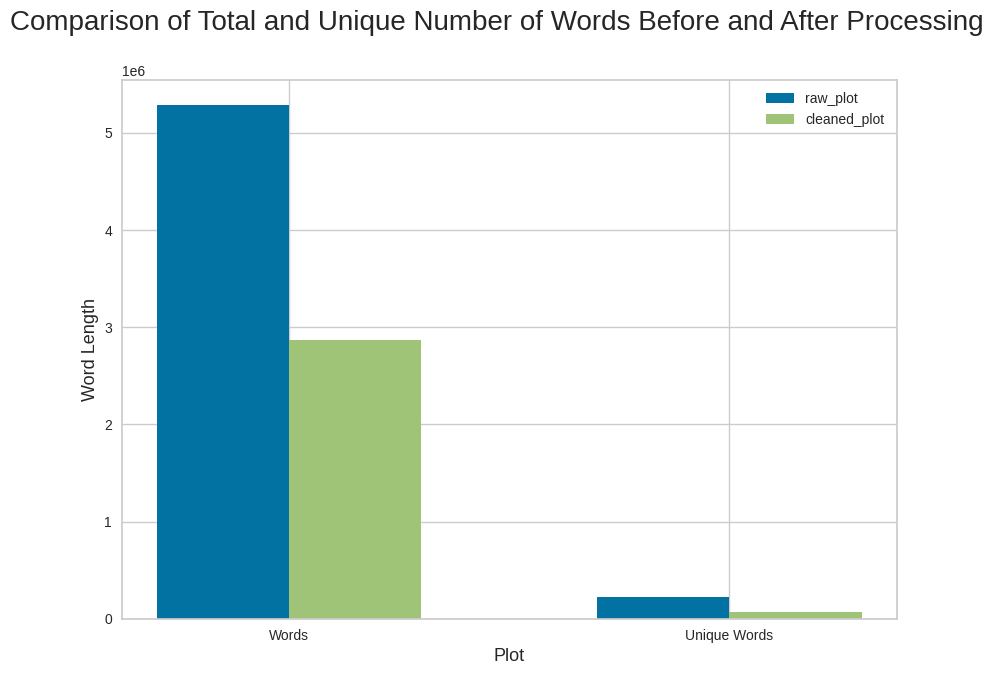

In [42]:
# Create a DataFrame
plot_length = [[raw_length, clean_length], [raw_unique_length, clean_unique_length]]
length_df = pd.DataFrame(plot_length, columns=['num_of_words', 'num_of_unique_words'])
length_df['index'] = ['raw_plot', 'cleaned_plot']

# Extracting y-values
y1 = length_df['num_of_words']
y2 = length_df['num_of_unique_words']

# Plotting
plt.figure(figsize=(10, 7))
ind = np.arange(2)
width = 0.3

# Plotting
plt.bar(ind, y1, width, label='raw_plot')
plt.bar(ind + width, y2, width, label='cleaned_plot')

# Adding labels and title
plt.xlabel('Plot', size=13)
plt.ylabel('Word Length', size=13)
plt.suptitle('Comparison of Total and Unique Number of Words Before and After Processing', size=20)
plt.xticks(ind + width / 2, ('Words', 'Unique Words'))
plt.legend(loc='best')
plt.show()
fig.savefig('/content/drive/MyDrive/git-colab-repo/movie-genre-classification/images/TotalVsUniqueWords.png')

In [43]:
length_df

,num_of_words,num_of_unique_words,index
0,5280349,2867652,raw_plot
1,223148,70677,cleaned_plot


## Modelling

Assigning Independent and Target Variables and splitting dataset into training and testing set

In [44]:
# Extract features (X) and labels (y)
X = copied_movies_df_label['Plot']
y = copied_movies_df_label['labels']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Print the shapes of the resulting sets
print(f"X_train shape: {X_train.shape}, X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}, y_test shape: {y_test.shape}")

X_train shape: (10147,), X_test shape: (4350,)
y_train shape: (10147,), y_test shape: (4350,)


In [ ]:
!git status

On branch model-tfidf
Changes not staged for commit:
  (use "git add/rm <file>..." to update what will be committed)
  (use "git restore <file>..." to discard changes in working directory)
	deleted:    Copy of main.ipynb
	modified:   main.ipynb

Untracked files:
  (use "git add <file>..." to include in what will be committed)
	main-CountVectorizer.ipynb

no changes added to commit (use "git add" and/or "git commit -a")


In [ ]:
!git add .
!git commit -m 'after running splitting cell'

[model-tfidf 257cfa3] after running splitting cell
 3 files changed, 2 insertions(+), 2 deletions(-)
 delete mode 100644 Copy of main.ipynb
 create mode 100644 main-CountVectorizer.ipynb
 rewrite main.ipynb (90%)


### TF-IDF Vectorizer technique

In [ ]:
# Create the TF-IDF vectorizer
vectorizer = TfidfVectorizer()

# Fit and transform the training data
X_train_tfidf = vectorizer.fit_transform(X_train)

# Transform the testing data (using the same vocabulary as the training data)
X_test_tfidf = vectorizer.transform(X_test)

#### Multinomial Naive Bayes classifier with TF-IDF vectorizer

without weight

In [ ]:
# Multinomial Naive Bayes Classifier
mnb = MultinomialNB()

# Fit the model
mnb.fit(X_train_tfidf, y_train)

# Training data scores
print("Model Score on Training data:", mnb.score(X_train_tfidf, y_train))

# Testing data scores
print("Model Score on Testing data:", mnb.score(X_test_tfidf, y_test))

# Predictions and Classification Report
y_pred = mnb.predict(X_test_tfidf)
print("Classification Report:")
print(classification_report(y_test, y_pred))

Model Score on Training data: 0.5553365526756677
Model Score on Testing data: 0.45057471264367815
Classification Report:
              precision    recall  f1-score   support

           1       0.43      0.99      0.60      1763
           2       0.86      0.16      0.27      1280
           3       0.00      0.00      0.00       352
           4       0.00      0.00      0.00       342
           5       0.00      0.00      0.00       322
           6       0.00      0.00      0.00       291

    accuracy                           0.45      4350
   macro avg       0.21      0.19      0.15      4350
weighted avg       0.43      0.45      0.32      4350



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


with some modified code

Model Training Time: 0.16 seconds
Model Score on Training data: 0.7529319010544989
Model Score on Testing data: 0.5395402298850575
F1 Score: 0.49
Accuracy Score: 0.54
Classification Report:
              precision    recall  f1-score   support

           1       0.49      0.85      0.62      1763
           2       0.67      0.55      0.60      1280
           3       0.74      0.21      0.32       352
           4       0.52      0.10      0.17       342
           5       0.10      0.01      0.02       322
           6       0.48      0.14      0.22       291

    accuracy                           0.54      4350
   macro avg       0.50      0.31      0.33      4350
weighted avg       0.54      0.54      0.49      4350



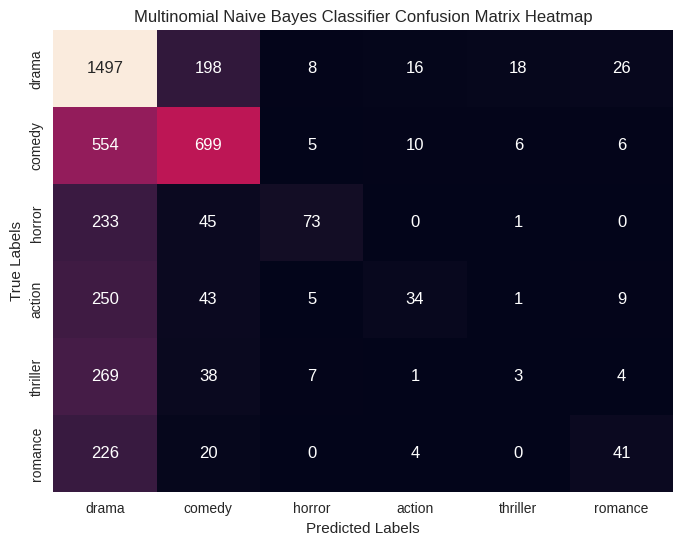

In [ ]:
# Compute class weights
class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)

# Multinomial Naive Bayes Classifier with class weights
mnb_model = MultinomialNB(class_prior=class_weights)

# Training the model
start_time_mnb = time.time()
mnb_model.fit(X_train_tfidf, y_train)
end_time_mnb = time.time()

# Calculate the running time
running_time_mnb = end_time_mnb - start_time_mnb
print(f"Model Training Time: {running_time_mnb:.2f} seconds")

# Model evaluation
print("Model Score on Training data:", mnb_model.score(X_train_tfidf, y_train))
print("Model Score on Testing data:", mnb_model.score(X_test_tfidf, y_test))

# Predictions
y_pred_mnb = mnb_model.predict(X_test_tfidf)

# F1 Score
f1_mnb = f1_score(y_test, y_pred_mnb, average='weighted')
print(f"F1 Score: {f1_mnb:.2f}")

# Accuracy Score
accuracy_mnb = accuracy_score(y_test, y_pred_mnb)
print(f"Accuracy Score: {accuracy_mnb:.2f}")

# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred_mnb))

# Confusion Matrix
cm_mnb = confusion_matrix(y_test, y_pred_mnb)

# Defining 'class_names' as class labels
class_names = ['drama', 'comedy', 'horror', 'action', 'thriller', 'romance']

plt.figure(figsize=(8, 6))
sns.heatmap(cm_mnb, annot=True, fmt='d', cbar=False,
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Multinomial Naive Bayes Classifier Confusion Matrix Heatmap')
plt.show()


#### Logistic Regression Classifier with TF-IDF Vectorizer

Model Training Time: 1.51 seconds
Model Score on Training data: 0.7759929043066917
Model Score on Testing data: 0.596551724137931
F1 Score: 0.55
Accuracy Score: 0.60
Classification Report:
              precision    recall  f1-score   support

           1       0.55      0.85      0.67      1763
           2       0.66      0.65      0.65      1280
           3       0.77      0.53      0.63       352
           4       0.69      0.17      0.27       342
           5       0.50      0.02      0.04       322
           6       0.59      0.08      0.14       291

    accuracy                           0.60      4350
   macro avg       0.63      0.38      0.40      4350
weighted avg       0.61      0.60      0.55      4350



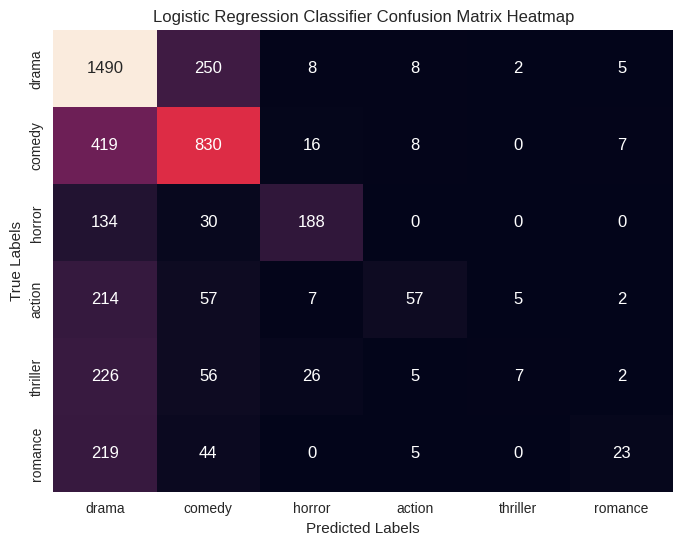

In [ ]:
# Logistic Regression Model
lr_model = LogisticRegression(max_iter=1000, solver='liblinear', C=1.0)

# Training the model
start_time_lr = time.time()
lr_model.fit(X_train_tfidf, y_train)
end_time_lr = time.time()

# Calculate the running time
running_time_lr = end_time_lr - start_time_lr
print(f"Model Training Time: {running_time_lr:.2f} seconds")

# Model evaluation
print("Model Score on Training data:", lr_model.score(X_train_tfidf, y_train))
print("Model Score on Testing data:", lr_model.score(X_test_tfidf, y_test))

# Predictions
y_pred_lr = lr_model.predict(X_test_tfidf)

# F1 Score
f1_lr = f1_score(y_test, y_pred_lr, average='weighted')
print(f"F1 Score: {f1_lr:.2f}")

# Accuracy Score
accuracy_lr = accuracy_score(y_test, y_pred_lr)
print(f"Accuracy Score: {accuracy_lr:.2f}")

# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred_lr))

# Confusion Matrix
cm_lr = confusion_matrix(y_test, y_pred_lr)

# Defining 'class_names' as class labels
class_names = ['drama', 'comedy', 'horror', 'action', 'thriller', 'romance']

plt.figure(figsize=(8, 6))
sns.heatmap(cm_lr, annot=True, fmt='d', cbar=False,
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Logistic Regression Classifier Confusion Matrix Heatmap')
plt.show()

#### Decisicion Tree Classifier with TF-IDF Vectorizer

Model Training Time: 18.32 seconds
Model Score on Training data: 0.9985217305607569
Model Score on Testing data: 0.4149425287356322
F1 Score: 0.41
Accuracy Score: 0.41
Classification Report:
              precision    recall  f1-score   support

           1       0.49      0.52      0.51      1763
           2       0.44      0.46      0.45      1280
           3       0.43      0.38      0.40       352
           4       0.24      0.20      0.22       342
           5       0.15      0.13      0.14       322
           6       0.20      0.17      0.19       291

    accuracy                           0.41      4350
   macro avg       0.32      0.31      0.32      4350
weighted avg       0.41      0.41      0.41      4350



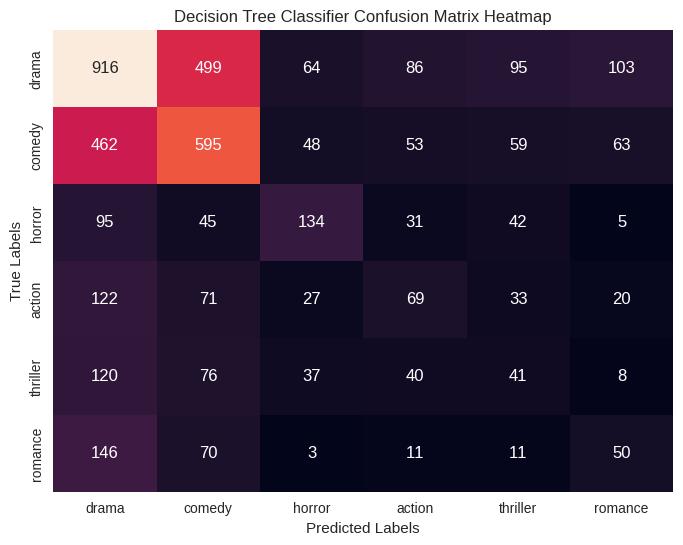

In [ ]:
# Decision Tree Model
dt_model = DecisionTreeClassifier(random_state=42)

# Training the model
start_time_dt = time.time()
dt_model.fit(X_train_tfidf, y_train)
end_time_dt = time.time()

# Calculate the running time
running_time_dt = end_time_dt - start_time_dt
print(f"Model Training Time: {running_time_dt:.2f} seconds")

# Model evaluation
print("Model Score on Training data:", dt_model.score(X_train_tfidf, y_train))
print("Model Score on Testing data:", dt_model.score(X_test_tfidf, y_test))

# Predictions
y_pred_dt = dt_model.predict(X_test_tfidf)

# F1 Score
f1_dt = f1_score(y_test, y_pred_dt, average='weighted')
print(f"F1 Score: {f1_dt:.2f}")

# Accuracy Score
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print(f"Accuracy Score: {accuracy_dt:.2f}")

# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred_dt))

# Confusion Matrix
cm_dt = confusion_matrix(y_test, y_pred_dt)

# Defining 'class_names' as class labels
class_names = ['drama', 'comedy', 'horror', 'action', 'thriller', 'romance']

plt.figure(figsize=(8, 6))
sns.heatmap(cm_dt, annot=True, fmt='d', cbar=False,
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Decision Tree Classifier Confusion Matrix Heatmap')
plt.show()

#### Random Forest Classifier with TF-IDF Vectorizer

Model Training Time: 51.22 seconds
Model Score on Training data: 0.9985217305607569
Model Score on Testing data: 0.5328735632183909
F1 Score: 0.46
Accuracy Score: 0.53
Classification Report:
              precision    recall  f1-score   support

           1       0.48      0.92      0.63      1763
           2       0.68      0.43      0.53      1280
           3       0.80      0.36      0.50       352
           4       0.87      0.04      0.07       342
           5       1.00      0.00      0.01       322
           6       0.50      0.00      0.01       291

    accuracy                           0.53      4350
   macro avg       0.72      0.29      0.29      4350
weighted avg       0.64      0.53      0.46      4350



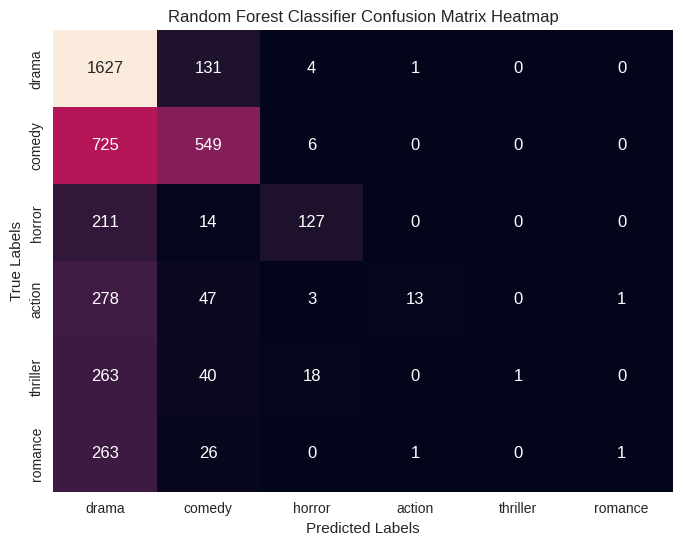

In [ ]:
# Random Forest Model
rf_model = RandomForestClassifier(random_state=42)

# Training the model
start_time_rf = time.time()
rf_model.fit(X_train_tfidf, y_train)
end_time_rf = time.time()

# Calculate the running time
running_time_rf = end_time_rf - start_time_rf
print(f"Model Training Time: {running_time_rf:.2f} seconds")

# Model evaluation
print("Model Score on Training data:", rf_model.score(X_train_tfidf, y_train))
print("Model Score on Testing data:", rf_model.score(X_test_tfidf, y_test))

# Predictions
y_pred_rf = rf_model.predict(X_test_tfidf)

# F1 Score
f1_rf = f1_score(y_test, y_pred_rf, average='weighted')
print(f"F1 Score: {f1_rf:.2f}")

# Accuracy Score
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Accuracy Score: {accuracy_rf:.2f}")

# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred_rf))

# Confusion Matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)

# Defining 'class_names' as class labels
class_names = ['drama', 'comedy', 'horror', 'action', 'thriller', 'romance']

plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, fmt='d', cbar=False,
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Random Forest Classifier Confusion Matrix Heatmap')
plt.show()

#### Support Vector Machine( SVC ) Classifier with TF-IDF Vectorizer

Model Training Time: 238.07 seconds
Model Score on Training data: 0.964718636050064
Model Score on Testing data: 0.585287356321839
F1 Score: 0.53
Accuracy Score: 0.59
Classification Report:
              precision    recall  f1-score   support

           1       0.53      0.87      0.66      1763
           2       0.69      0.61      0.65      1280
           3       0.79      0.52      0.63       352
           4       0.64      0.10      0.17       342
           5       0.67      0.01      0.01       322
           6       0.66      0.07      0.13       291

    accuracy                           0.59      4350
   macro avg       0.66      0.36      0.37      4350
weighted avg       0.62      0.59      0.53      4350



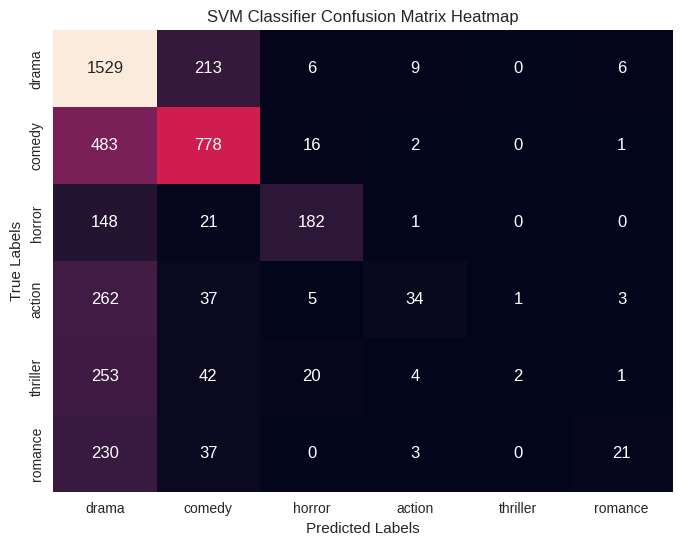

In [ ]:
# Support Vector Machine (SVC) Model
svm_model = SVC(random_state=42)

# Training the model
start_time_svm = time.time()
svm_model.fit(X_train_tfidf, y_train)
end_time_svm = time.time()

# Calculate the running time
running_time_svm = end_time_svm - start_time_svm
print(f"Model Training Time: {running_time_svm:.2f} seconds")

# Model evaluation
print("Model Score on Training data:", svm_model.score(X_train_tfidf, y_train))
print("Model Score on Testing data:", svm_model.score(X_test_tfidf, y_test))

# Predictions
y_pred_svm = svm_model.predict(X_test_tfidf)

# F1 Score
f1_svm = f1_score(y_test, y_pred_svm, average='weighted')
print(f"F1 Score: {f1_svm:.2f}")

# Accuracy Score
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f"Accuracy Score: {accuracy_svm:.2f}")

# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred_svm))

# Confusion Matrix
cm_svm = confusion_matrix(y_test, y_pred_svm)

# Defining 'class_names' as class labels
class_names = ['drama', 'comedy', 'horror', 'action', 'thriller', 'romance']

plt.figure(figsize=(8, 6))
sns.heatmap(cm_svm, annot=True, fmt='d', cbar=False,
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('SVM Classifier Confusion Matrix Heatmap')
plt.show()

In [ ]:
!git status

On branch model-tfidf
Changes not staged for commit:
  (use "git add <file>..." to update what will be committed)
  (use "git restore <file>..." to discard changes in working directory)
	modified:   main.ipynb

no changes added to commit (use "git add" and/or "git commit -a")


In [ ]:
!git add .
!git commit -m 'init bert, but need to revise.'


[model-tfidf 266c052] init bert, but need to revise.
 1 file changed, 1 insertion(+), 1 deletion(-)
 rewrite main.ipynb (63%)


In [ ]:
!git push origin "model-tfidf"

Enumerating objects: 19, done.
Counting objects: 100% (19/19), done.
Delta compression using up to 2 threads
Compressing objects: 100% (17/17), done.
Writing objects: 100% (17/17), 479.56 KiB | 6.23 MiB/s, done.
Total 17 (delta 10), reused 0 (delta 0), pack-reused 0
remote: Resolving deltas: 100% (10/10), completed with 1 local object.
remote: 
remote: Create a pull request for 'model-tfidf' on GitHub by visiting:
remote:      https://github.com/naamalia23/movie-genre-classification/pull/new/model-tfidf
remote: 
To https://github.com/naamalia23/movie-genre-classification
 * [new branch]      model-tfidf -> model-tfidf


### BERT Model

In [45]:
# Install necessary libraries
!pip install tensorflow transformers

In [46]:
# Import libraries
import tensorflow as tf
from transformers import BertTokenizer, TFBertForSequenceClassification
from sklearn.preprocessing import LabelEncoder
# Import libraries
import re
import nltk
import string
import tensorflow as tf
from transformers import BertTokenizer, TFBertForSequenceClassification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import pandas as pd
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Download NLTK resources
nltk.download('stopwords')
nltk.download('punkt')

In [52]:
# Load dataset (replace 'your_dataset.csv' with your actual dataset)
# The dataset should have a 'Plot' column containing movie plot summaries and a 'genre' column with genre labels.
df = movies_df.copy()

# Function for text preprocessing
def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()

    # Remove punctuation and numbers
    text = re.sub(r'[^\w\s]', '', text)
    text = re.sub(r'\d', '', text)

    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(text)
    text = ' '.join([word for word in word_tokens if word.lower() not in stop_words])

    return text

# Apply text preprocessing to the 'Plot' column
df['Cleaned_Plot'] = df['Plot'].apply(preprocess_text)

# Encode labels
label_encoder = LabelEncoder()
df['encoded_genre'] = label_encoder.fit_transform(df['Genre'])

# Split the dataset into training and testing sets
train_texts, test_texts, train_labels, test_labels = train_test_split(
    df['Cleaned_Plot'].values,
    df['encoded_genre'].values,
    test_size=0.2,
    random_state=42
)

# Load BERT tokenizer and model
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = TFBertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=len(label_encoder.classes_))

# Tokenize and encode the training and testing texts
train_encodings = tokenizer(train_texts.tolist(), truncation=True, padding=True, max_length=128, return_tensors='tf')
test_encodings = tokenizer(test_texts.tolist(), truncation=True, padding=True, max_length=128, return_tensors='tf')

# Extract tensors from BatchEncoding
train_encodings = {key: tf.convert_to_tensor(value) for key, value in train_encodings.items()}
test_encodings = {key: tf.convert_to_tensor(value) for key, value in test_encodings.items()}

# Convert labels to TensorFlow format
train_labels = tf.convert_to_tensor(train_labels)
test_labels = tf.convert_to_tensor(test_labels)

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(train_encodings, train_labels, epochs=3, batch_size=32)

# Evaluate the model on the test set
loss, accuracy = model.evaluate(test_encodings, test_labels)
print(f'Test accuracy: {accuracy}')

# Make predictions on new data
new_texts = ["A thrilling adventure through space.", "A romantic drama set in the 19th century."]
new_texts = [preprocess_text(text) for text in new_texts]
new_encodings = tokenizer(new_texts, truncation=True, padding=True, max_length=128, return_tensors='tf')
new_encodings = {key: tf.convert_to_tensor(value) for key, value in new_encodings.items()}
predictions = model.predict(new_encodings)
predicted_labels = label_encoder.inverse_transform(tf.argmax(predictions.logits, axis=1))

print(f'Predicted genres: {predicted_labels}')

All PyTorch model weights were used when initializing TFBertForSequenceClassification.

Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1/3
873/873 [==============================] - 718s 771ms/step - loss: 8.5612 - accuracy: 0.1641
Epoch 2/3
873/873 [==============================] - 685s 785ms/step - loss: 8.5664 - accuracy: 0.1657
Epoch 3/3
219/219 [==============================] - 66s 283ms/step - loss: 8.5031 - accuracy: 0.1725
Test accuracy: 0.1725422739982605
1/1 [==============================] - 4s 4s/step
Predicted genres: ['drama' 'drama']


In [53]:
!git status

On branch bert-model
Changes not staged for commit:
  (use "git add <file>..." to update what will be committed)
  (use "git restore <file>..." to discard changes in working directory)
	modified:   main.ipynb

no changes added to commit (use "git add" and/or "git commit -a")


In [ ]:
!git add .
!git commit -m 'adding bert model-first'
!git push origin 'ber-model'